# Data Visualization

## Learning Objectives
After completing this lesson, you will be able to:
- Create and customize visualizations using matplotlib
- Build subplots and multi-plot figures
- Use Pandas plotting methods for quick visualization
- Create statistical plots with seaborn

---

## Why Data Visualization Matters
Making informative visualizations is one of the most important tasks in data analysis. You may need to:
- **Explore data**: Identify patterns, outliers, and distributions through EDA (Exploratory Data Analysis)
- **Communicate findings**: Present results to both technical and non-technical audiences
- **Tell stories**: Use interactive visualizations to engage stakeholders

This lesson covers three powerful visualization tools: **matplotlib** (foundation), **pandas plotting** (convenience), and **seaborn** (statistical graphics).

---

# Section 1: Fundamentals of Matplotlib

In this section, you will learn the basics of matplotlib, including creating simple plots, understanding figures and axes, and basic customization.

## 1.1 Setup and First Steps

### Importing Required Libraries
First, import the libraries needed for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(111)

print('Libraries imported successfully!')

Libraries imported successfully!


### Understanding Matplotlib

`matplotlib` is a multi-platform data visualization library built on NumPy arrays and designed to work with pandas. It provides an **object-oriented API** for plotting graphs and charts.

**The Matplotlib Hierarchy:**
1. **Figure**: The overall canvas/window
2. **Axes**: Individual plots (subplots) within the figure
3. **Plot methods**: Drawing methods like `.plot()`, `.scatter()`, `.hist()`

### 1.2 Creating Your First Plot

The simplest plot type is a **line plot**, which is the default in matplotlib.

Data: [0 1 2 3 4 5 6 7 8 9]


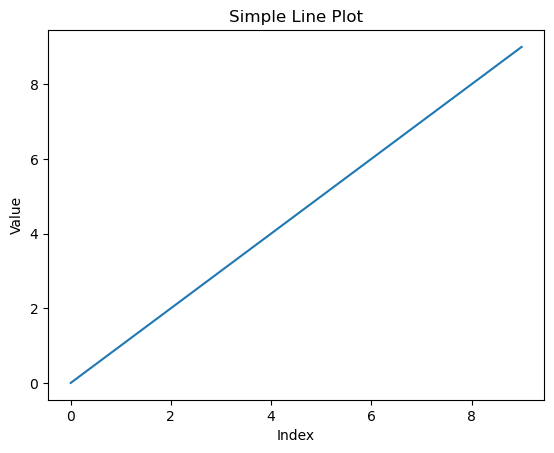

In [2]:
# Example 1: Plot from NumPy array
data = np.arange(10)
print('Data:', data)

plt.plot(data)
plt.title('Simple Line Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

**What happened?** Matplotlib automatically:
- Used indices (0-9) as x-axis
- Used values (0-9) as y-axis
- Applied default styling

Series with custom index:
2     0
4     1
6     2
8     3
10    4
dtype: int64


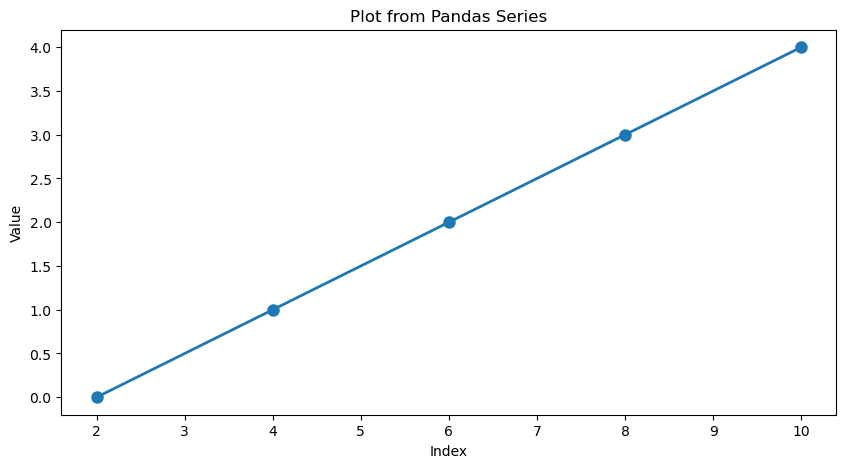

In [3]:
# Example 2: Plot from Pandas Series (with custom index)
series_data = pd.Series(np.arange(5), index=np.arange(2, 12, 2))
print('Series with custom index:')
print(series_data)

plt.figure(figsize=(10, 5))
plt.plot(series_data, marker='o', linewidth=2, markersize=8)
plt.title('Plot from Pandas Series')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

**Key difference:** When plotting a Pandas Series:
- x-axis uses the Series **index**
- y-axis uses the Series **values**

### ✏️ Exercise 1.1: Your First Plot

**Task**: Create a line plot with the following requirements:
1. Create a Pandas Series with values `[10, 20, 15, 25, 30]` and index `['A', 'B', 'C', 'D', 'E']`
2. Plot the series with a marker (you choose: 'o', 's', '^', etc.)
3. Add title, xlabel, and ylabel
4. Set figure size to (8, 4)

**Hint**: Use `figsize=(8, 4)` in `plt.figure()` and `marker='o'` in `plt.plot()`

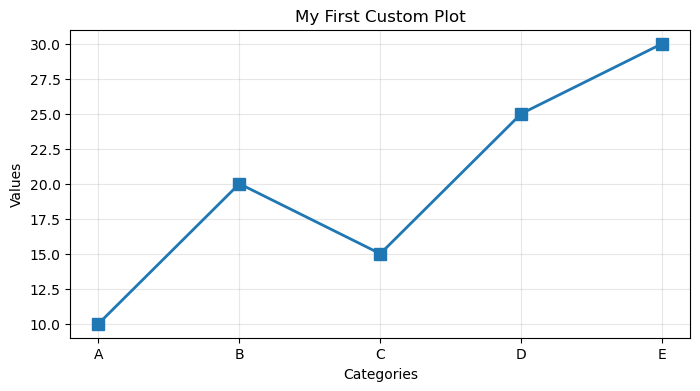

In [6]:
# Create a Pandas Series with the specified values and index
my_series = pd.Series([10, 20, 15, 25, 30], index=['A', 'B', 'C', 'D', 'E'])

# Create figure with specified size
plt.figure(figsize=(8, 4))

# Plot with marker
plt.plot(my_series, marker='s', linewidth=2, markersize=8)

# Add labels and title
plt.title('My First Custom Plot')
plt.xlabel('Categories')
plt.ylabel('Values')

# Optional: Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()

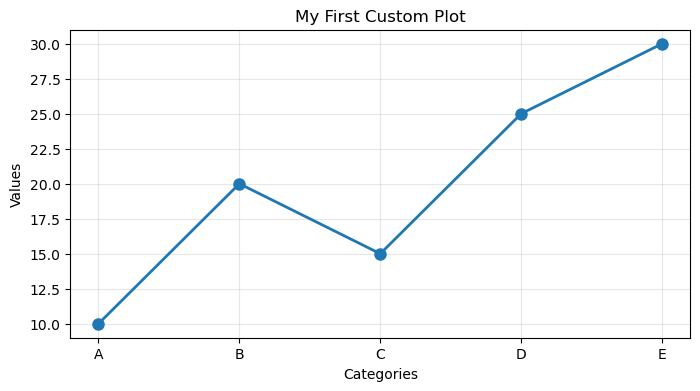

In [7]:
# Exercise 1.1 Solution
# Your code here:

my_series = pd.Series([10, 20, 15, 25, 30], index=['A', 'B', 'C', 'D', 'E'])

plt.figure(figsize=(8, 4))
plt.plot(my_series, marker='o', linewidth=2, markersize=8)
plt.title('My First Custom Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.grid(True, alpha=0.3)
plt.show()

## 1.3 Figures and Subplots

Real-world visualizations often require multiple plots. Use subplots to arrange multiple plots in a grid.

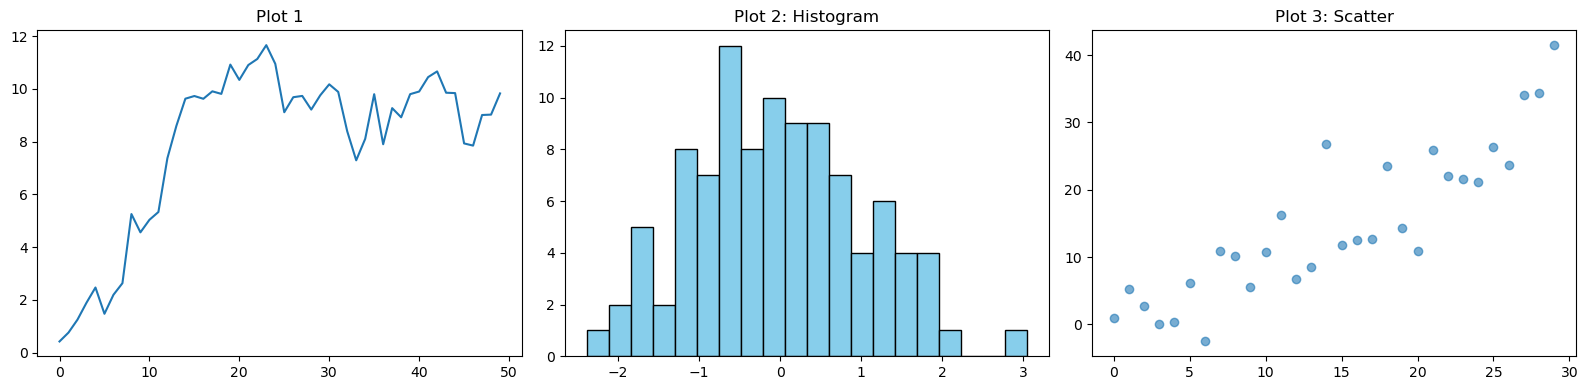

In [15]:
# Method 1: Manual figure + axes creation
fig = plt.figure(figsize=(16,4))

# Add first subplot at position (1,3,1) = 1 row, 3 cols, position 1
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(np.random.randn(50).cumsum())
ax1.set_title('Plot 1')

# Add second subplot
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(np.random.randn(100), bins=20, color='skyblue', edgecolor='black')
ax2.set_title('Plot 2: Histogram')

# Add third subplot
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(np.arange(30), np.arange(30) + 5*np.random.randn(30), alpha=0.6)
ax3.set_title('Plot 3: Scatter')

fig.tight_layout()  # Adjust spacing
# fig

Type of axes: <class 'numpy.ndarray'>
Shape of axes: (2, 2)


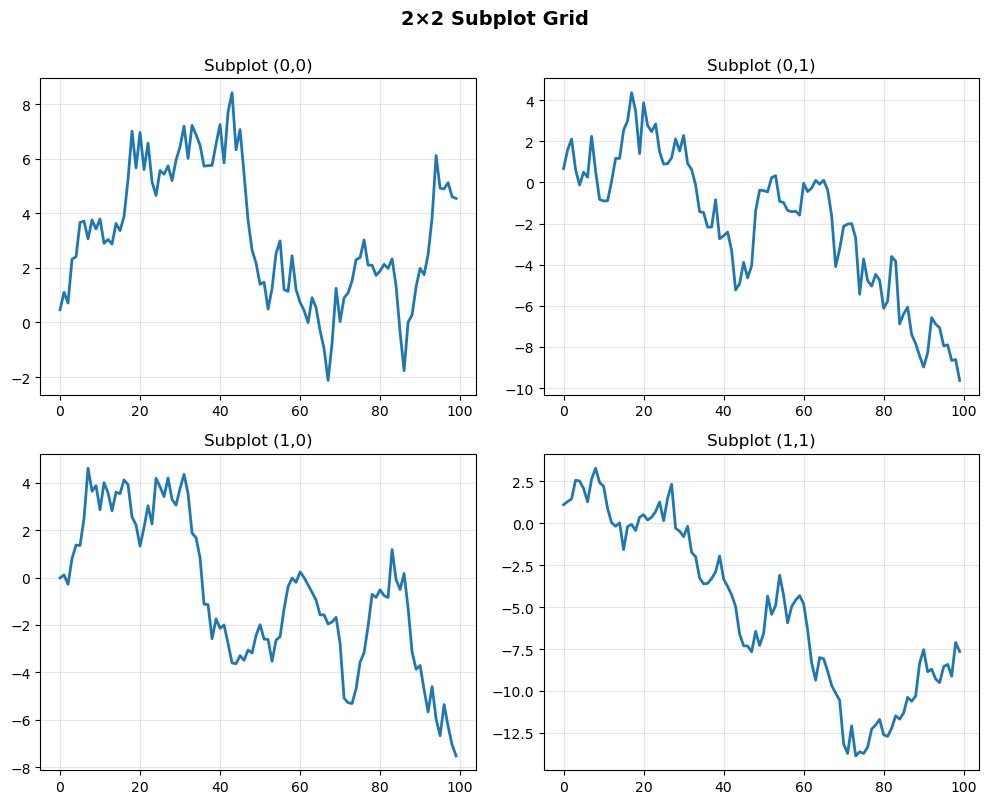

In [18]:
# Method 2: Using plt.subplots() - More convenient!
# Code explanation:
# - plt.subplots(rows, cols, figsize=(width, height))
# - Returns (fig, axes) where axes is a NumPy array of Axes objects

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# axes is a 2D array, access with axes[row, col]
print(f'Type of axes: {type(axes)}')
print(f'Shape of axes: {axes.shape}')

# Plot in each subplot
for i in range(2):
    for j in range(2):
        data = np.random.standard_normal(100).cumsum()
        axes[i, j].plot(data, linewidth=2)
        axes[i, j].set_title(f'Subplot ({i},{j})')
        axes[i, j].grid(True, alpha=0.3)

fig.suptitle('2×2 Subplot Grid', fontsize=14, fontweight='bold', y=1.00)
fig.tight_layout()
# fig

### ✏️ Exercise 1.2: Create a Subplot Grid

**Task**: Create a 2×2 subplot grid with:
1. **Top-left**: Line plot of random cumulative data
2. **Top-right**: Histogram with 30 bins
3. **Bottom-left**: Bar plot with 5 bars (values: 3, 7, 2, 8, 5)
4. **Bottom-right**: Scatter plot of random x,y pairs

Each subplot should have:
- A title
- Grid enabled (alpha=0.3)
- Proper labels

**Hint**: Use `axes[i, j]` to access each subplot

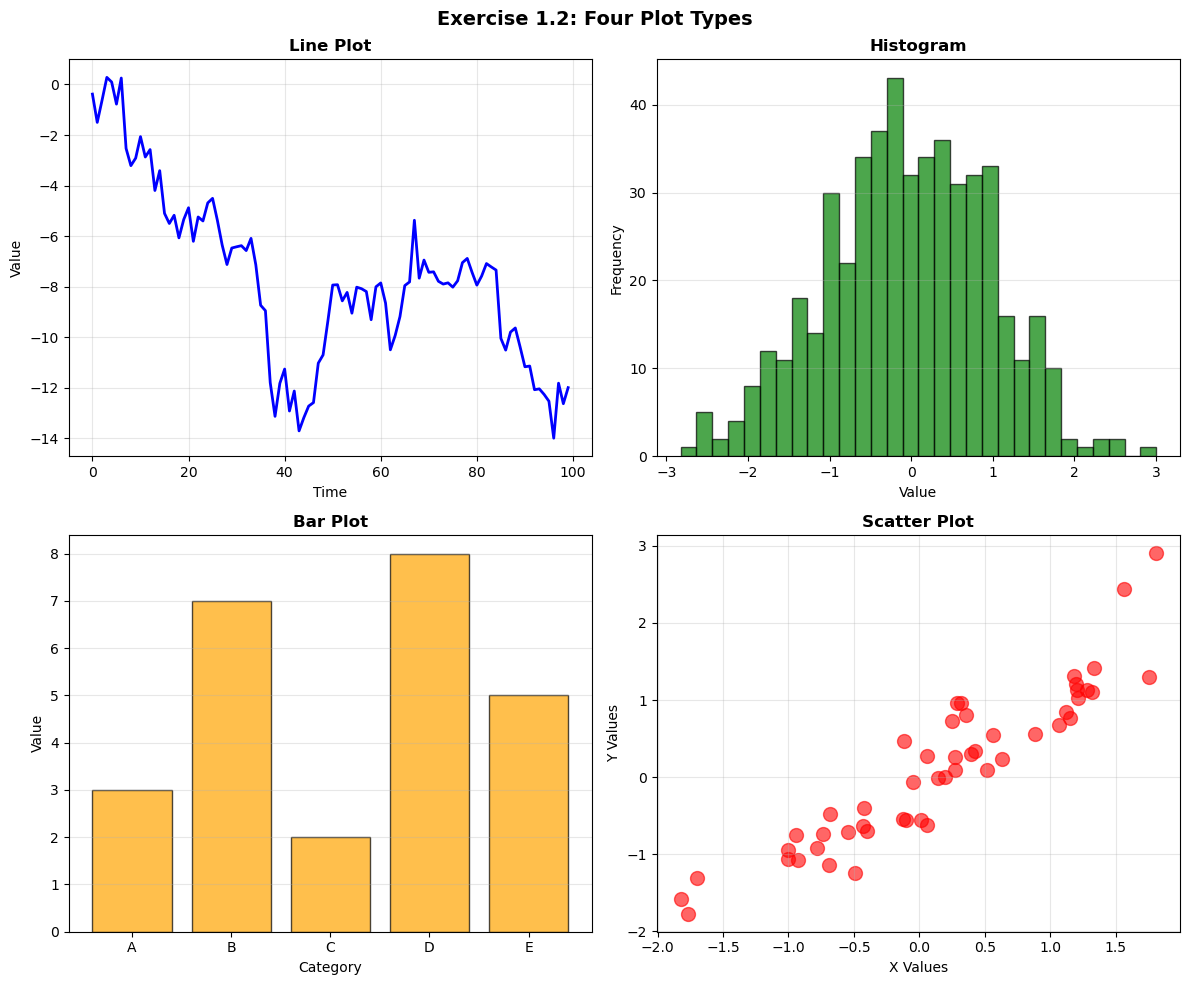

In [19]:
# Exercise 1.2 Solution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top-left: Line plot of random cumulative data
axes[0, 0].plot(np.random.standard_normal(100).cumsum(), linewidth=2, color='blue')
axes[0, 0].set_title('Line Plot', fontweight='bold')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Top-right: Histogram with 30 bins
axes[0, 1].hist(np.random.randn(500), bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Histogram', fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Bottom-left: Bar plot with 5 bars
values = [3, 7, 2, 8, 5]
categories = ['A', 'B', 'C', 'D', 'E']
axes[1, 0].bar(categories, values, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Bar Plot', fontweight='bold')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Bottom-right: Scatter plot
x = np.random.randn(50)
y = x + np.random.randn(50) * 0.5
axes[1, 1].scatter(x, y, alpha=0.6, s=100, color='red')
axes[1, 1].set_title('Scatter Plot', fontweight='bold')
axes[1, 1].set_xlabel('X Values')
axes[1, 1].set_ylabel('Y Values')
axes[1, 1].grid(True, alpha=0.3)

fig.suptitle('Exercise 1.2: Four Plot Types', fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

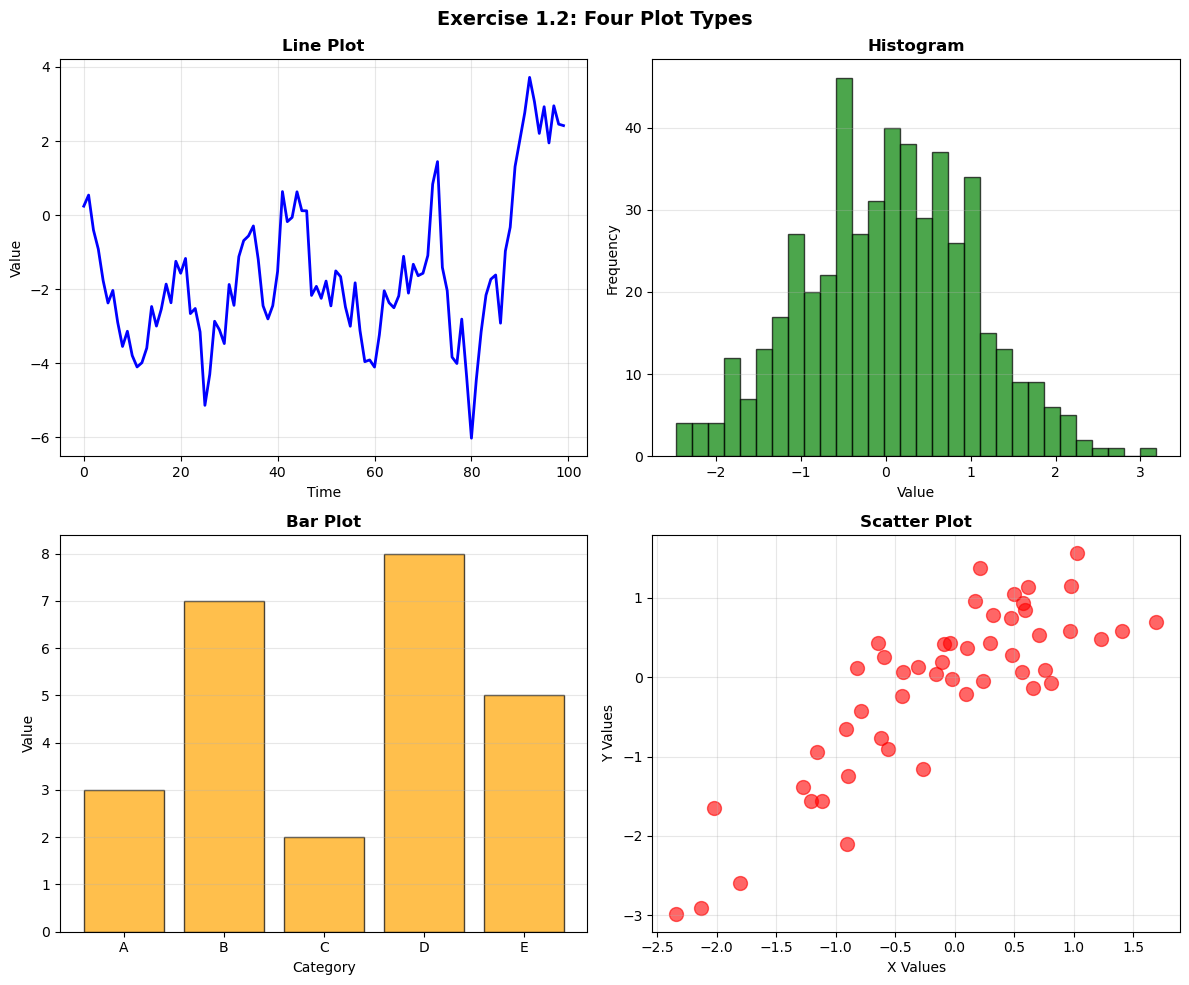

In [20]:
# Exercise 1.2 Solution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top-left: Line plot
axes[0, 0].plot(np.random.standard_normal(100).cumsum(), linewidth=2, color='blue')
axes[0, 0].set_title('Line Plot', fontweight='bold')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Top-right: Histogram
axes[0, 1].hist(np.random.randn(500), bins=30, color='green', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Histogram', fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Bottom-left: Bar plot
values = [3, 7, 2, 8, 5]
categories = ['A', 'B', 'C', 'D', 'E']
axes[1, 0].bar(categories, values, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Bar Plot', fontweight='bold')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Value')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Bottom-right: Scatter plot
x = np.random.randn(50)
y = x + np.random.randn(50) * 0.5
axes[1, 1].scatter(x, y, alpha=0.6, s=100, color='red')
axes[1, 1].set_title('Scatter Plot', fontweight='bold')
axes[1, 1].set_xlabel('X Values')
axes[1, 1].set_ylabel('Y Values')
axes[1, 1].grid(True, alpha=0.3)

fig.suptitle('Exercise 1.2: Four Plot Types', fontsize=14, fontweight='bold')
fig.tight_layout()
# fig

## 1.4 Styling and Customization

Make plots more visually appealing with colors, markers, and line styles.

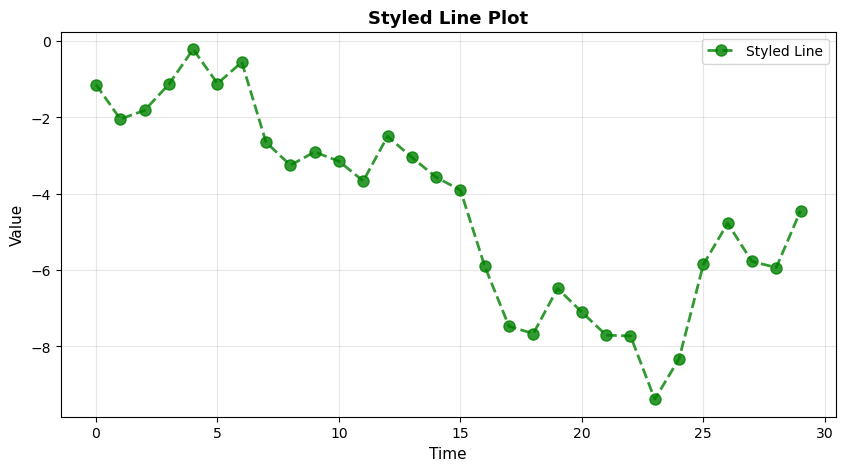

In [21]:
# Styling parameters
# Code explanation:
# - color: Line color ('red', 'blue', '#FF5733', etc.)
# - linestyle: Line pattern ('--', '-.', ':', '-')
# - marker: Point marker ('o', 's', '^', 'D', '*')
# - linewidth: Thickness of line
# - alpha: Transparency (0=invisible, 1=opaque)

fig, ax = plt.subplots(figsize=(10, 5))

data = np.random.standard_normal(30).cumsum()

ax.plot(data, 
        color='green',          # Green line
        linestyle='--',         # Dashed line
        marker='o',             # Circle markers
        linewidth=2,            # Thicker line
        markersize=8,           # Marker size
        alpha=0.8,              # Slightly transparent
        label='Styled Line')    # Legend label

ax.set_title('Styled Line Plot', fontsize=13, fontweight='bold')
ax.set_xlabel('Time', fontsize=11)
ax.set_ylabel('Value', fontsize=11)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
# fig

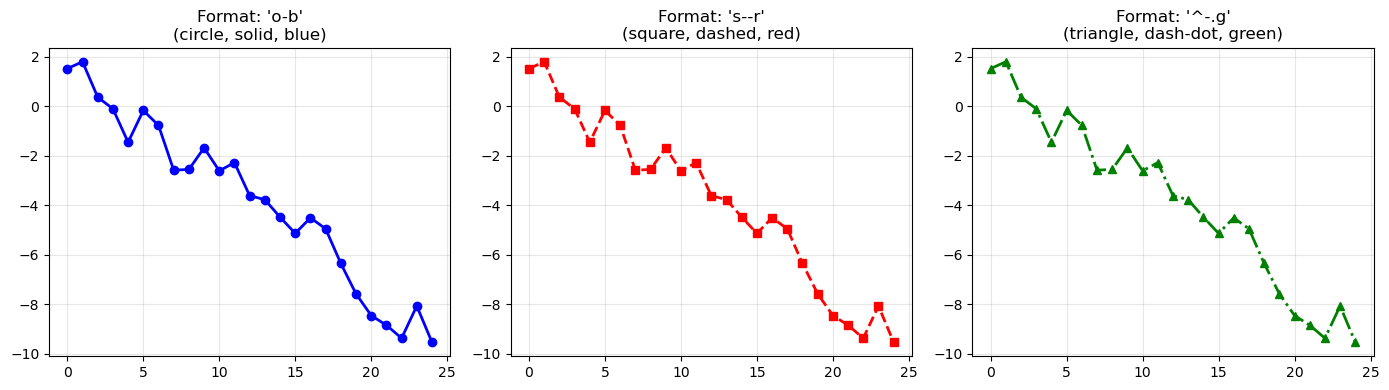

In [22]:
# Using format strings (shorthand notation)
# Format: 'marker + linestyle + color'
# Examples: 'o-b' = circle marker, solid line, blue
#           's--r' = square marker, dashed line, red
#           '^-.g' = triangle marker, dash-dot line, green

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

data = np.random.standard_normal(25).cumsum()

# Plot 1: 'o-b' = circles, solid line, blue
axes[0].plot(data, 'o-b', linewidth=2, markersize=6)
axes[0].set_title("Format: 'o-b'\n(circle, solid, blue)")
axes[0].grid(True, alpha=0.3)

# Plot 2: 's--r' = squares, dashed line, red
axes[1].plot(data, 's--r', linewidth=2, markersize=6)
axes[1].set_title("Format: 's--r'\n(square, dashed, red)")
axes[1].grid(True, alpha=0.3)

# Plot 3: '^-.g' = triangles, dash-dot line, green
axes[2].plot(data, '^-.g', linewidth=2, markersize=6)
axes[2].set_title("Format: '^-.g'\n(triangle, dash-dot, green)")
axes[2].grid(True, alpha=0.3)

fig.tight_layout()
# fig

### ✏️ Exercise 1.3: Styling with Format Strings

**Task**: Create a 1×3 subplot grid plotting the same data three times, but with different styling:
1. **Left plot**: Magenta color ('m'), star markers ('*'), dashed line ('--')
2. **Middle plot**: Cyan color ('c'), diamond markers ('D'), dash-dot line ('-.')
3. **Right plot**: Yellow color ('y'), plus markers ('+'), dotted line (':')

Use the data: `np.random.standard_normal(20).cumsum()`

Each subplot should have:
- A descriptive title
- Grid enabled
- Appropriate labels

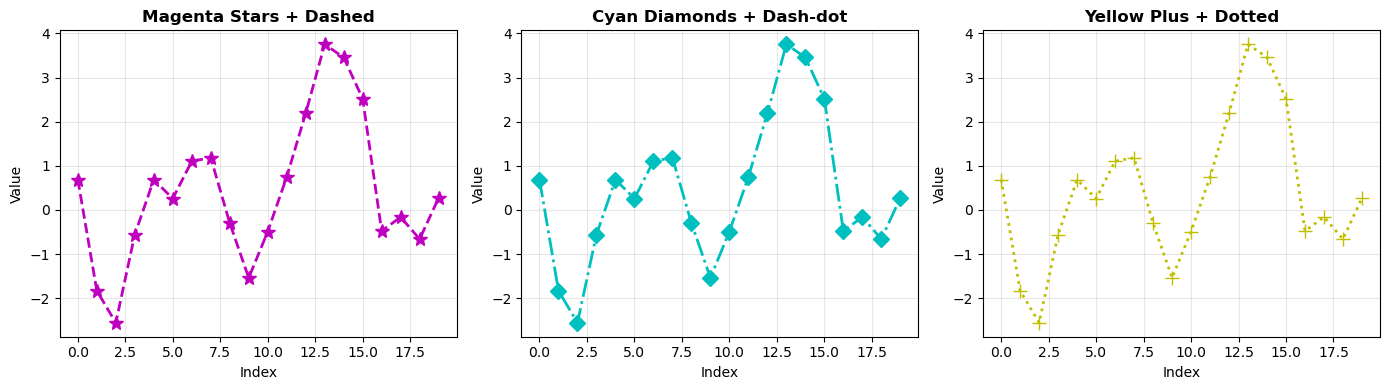

In [23]:
# Exercise 1.3 Solution
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

data = np.random.standard_normal(20).cumsum()

# Left: Magenta stars, dashed
axes[0].plot(data, 'm*--', linewidth=2, markersize=10)
axes[0].set_title('Magenta Stars + Dashed', fontweight='bold')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# Middle: Cyan diamonds, dash-dot
axes[1].plot(data, 'cD-.', linewidth=2, markersize=8)
axes[1].set_title('Cyan Diamonds + Dash-dot', fontweight='bold')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

# Right: Yellow plus, dotted
axes[2].plot(data, 'y+:', linewidth=2, markersize=10)
axes[2].set_title('Yellow Plus + Dotted', fontweight='bold')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Value')
axes[2].grid(True, alpha=0.3)

fig.tight_layout()
plt.show()

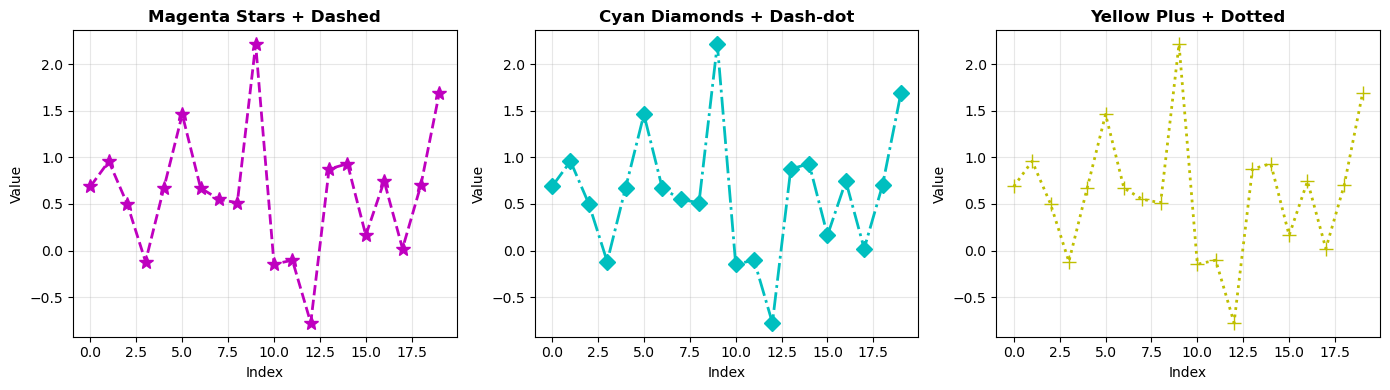

In [24]:
# Exercise 1.3 Solution
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

data = np.random.standard_normal(20).cumsum()

# Left: Magenta stars, dashed
axes[0].plot(data, 'm*--', linewidth=2, markersize=10)
axes[0].set_title('Magenta Stars + Dashed', fontweight='bold')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# Middle: Cyan diamonds, dash-dot
axes[1].plot(data, 'cD-.', linewidth=2, markersize=8)
axes[1].set_title('Cyan Diamonds + Dash-dot', fontweight='bold')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

# Right: Yellow plus, dotted
axes[2].plot(data, 'y+:', linewidth=2, markersize=10)
axes[2].set_title('Yellow Plus + Dotted', fontweight='bold')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Value')
axes[2].grid(True, alpha=0.3)

fig.tight_layout()
# fig

## 1.5 Axes Labels and Limits

Control tick positions, labels, and axis ranges to make plots more readable.

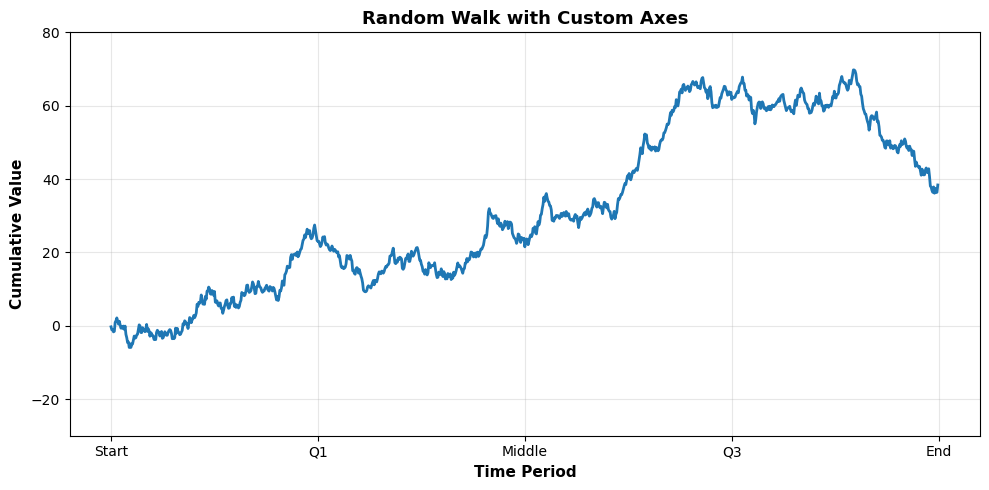

In [26]:
# Create data
fig, ax = plt.subplots(figsize=(10, 5))
rng = np.random.default_rng(seed=111)
data = rng.standard_normal(1000).cumsum()

ax.plot(data, linewidth=2)

# Code explanation:
# - set_xticks(): Position where ticks appear
# - set_xticklabels(): Labels for each tick
# - set_xlim(): Set axis range
# - set_xlabel(): Label for entire axis

# Set custom tick positions and labels
ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_xticklabels(['Start', 'Q1', 'Middle', 'Q3', 'End'], rotation=0, fontsize=10)

# Set axis range
ax.set_xlim(-50, 1050)
ax.set_ylim(-30, 80)

# Add labels and title
ax.set_xlabel('Time Period', fontsize=11, fontweight='bold')
ax.set_ylabel('Cumulative Value', fontsize=11, fontweight='bold')
ax.set_title('Random Walk with Custom Axes', fontsize=13, fontweight='bold')

ax.grid(True, alpha=0.3)
fig.tight_layout()
# fig

### ✏️ Exercise 1.4: Custom Axes Labels

**Task**: Create a plot with custom axes:
1. Create data: `np.arange(1, 101)` (x) and `np.random.randn(100).cumsum() * 5 + 50` (y)
2. Create a figure and plot the data
3. Set x-axis:
   - Ticks at: [0, 25, 50, 75, 100]
   - Labels: ['0%', '25%', '50%', '75%', '100%']
4. Set y-axis:
   - Ticks at: [25, 50, 75, 100]
   - Labels: ['Low', 'Medium', 'High', 'Very High']
5. Add appropriate title and axis labels

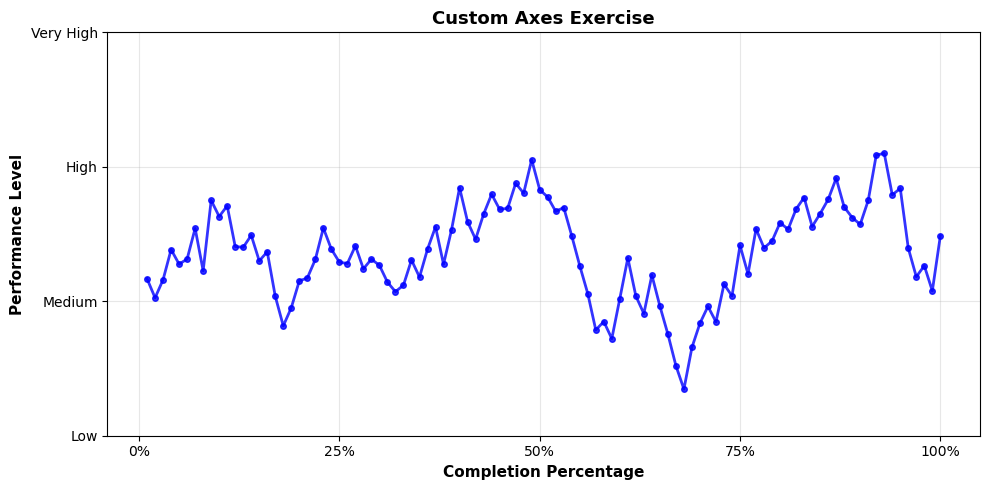

In [27]:
# Exercise 1.4 Solution
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(1, 101)
y = np.random.randn(100).cumsum() * 5 + 50

ax.plot(x, y, 'b-o', linewidth=2, markersize=4, alpha=0.8)

# Set X-axis
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# Set Y-axis
ax.set_yticks([25, 50, 75, 100])
ax.set_yticklabels(['Low', 'Medium', 'High', 'Very High'])

# Labels and title
ax.set_xlabel('Completion Percentage', fontsize=11, fontweight='bold')
ax.set_ylabel('Performance Level', fontsize=11, fontweight='bold')
ax.set_title('Custom Axes Exercise', fontsize=13, fontweight='bold')

ax.grid(True, alpha=0.3)
fig.tight_layout()
# fig

---

# Section 2: Pandas and Seaborn Basics

In this section, you will learn high-level visualization using Pandas built-in plotting and seaborn's statistical graphics.

## 2.1 Quick Visualization with Pandas

Pandas objects (Series and DataFrame) have built-in `.plot()` methods for quick visualization.

In [28]:
# Create sample time series data
dates = pd.date_range('2023-01-01', periods=100)
values_a = np.random.standard_normal(100).cumsum() + 100
values_b = np.random.standard_normal(100).cumsum() + 100

# Create DataFrame
df = pd.DataFrame({
    'Series_A': values_a,
    'Series_B': values_b
}, index=dates)

print('DataFrame (first 5 rows):')
print(df.head())

DataFrame (first 5 rows):
             Series_A    Series_B
2023-01-01  98.307007   99.602505
2023-01-02  97.356708   98.888845
2023-01-03  96.670789   99.613004
2023-01-04  94.050742  100.691189
2023-01-05  93.317563  101.791664


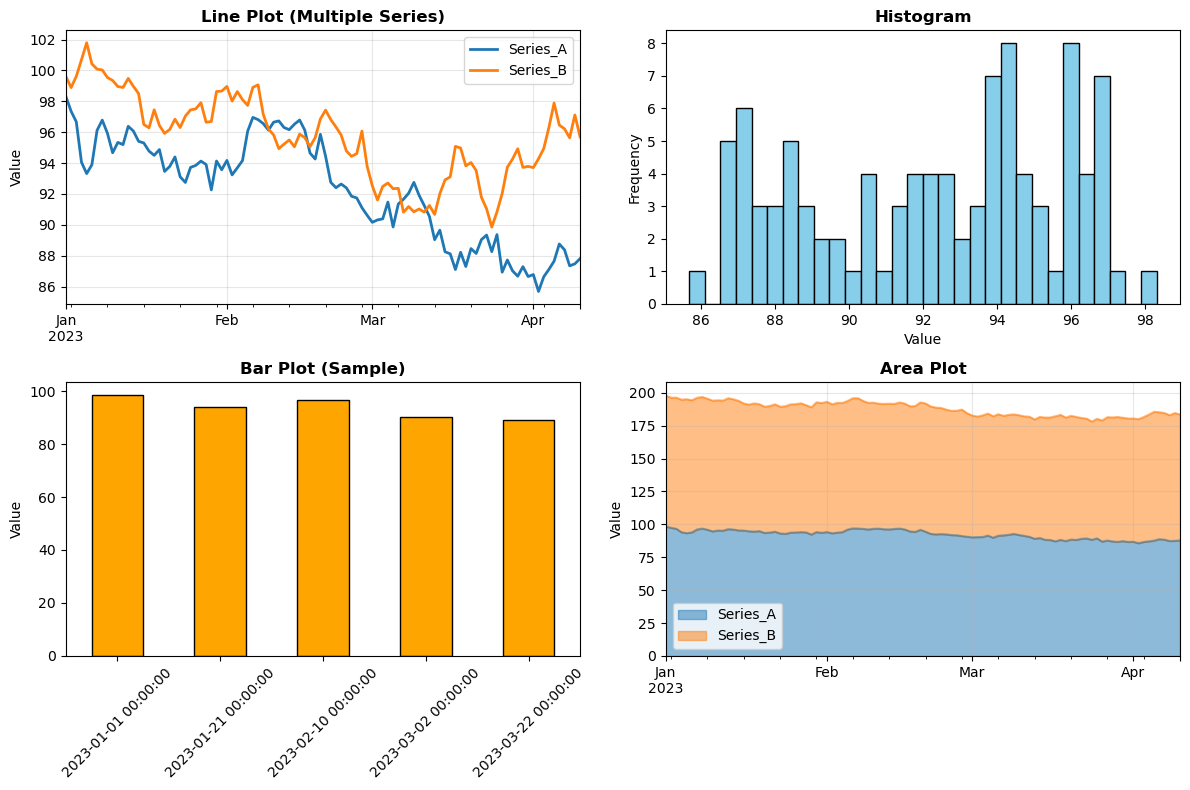

In [36]:
# Pandas plotting is very convenient
# Code explanation:
# - .plot(): Default line plot
# - .plot.hist(): Histogram
# - .plot.bar(): Bar chart
# - .plot.box(): Box plot

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Line plot (default)
df.plot(ax=axes[0, 0], linewidth=2)
axes[0, 0].set_title('Line Plot (Multiple Series)', fontweight='bold')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)

# Histogram
df['Series_A'].plot.hist(ax=axes[0, 1], bins=30, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Histogram', fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Frequency')

# Bar plot
sample = df.iloc[::20]  # Take every 20th row
sample['Series_A'].plot.bar(ax=axes[1, 0], color='orange', edgecolor='black')
axes[1, 0].set_title('Bar Plot (Sample)', fontweight='bold')
axes[1, 0].set_ylabel('Value')
axes[1, 0].tick_params(axis='x', rotation=45)

# Area plot
df.plot.area(ax=axes[1, 1], alpha=0.5)
axes[1, 1].set_title('Area Plot', fontweight='bold')
axes[1, 1].set_ylabel('Value')
axes[1, 1].grid(True, alpha=0.3)

fig.tight_layout()
# fig

### ✏️ Exercise 2.1: Pandas Plotting Methods

**Task**: Using the dataframe `df` created above, create a 1×2 subplot grid:

1. **Left subplot**: Density plot (KDE) of both series
   - Use `.plot.density()` or `.plot.kde()`
   - Enable legend
   - Add title and labels

2. **Right subplot**: Stacked area plot
   - Use `.plot.area(stacked=True, alpha=0.5)`
   - Add title and labels

**Hint**: Use `df.plot(kind='density', ax=axes[0, 0])`

# Exercise 2.1 Solution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Density plot
df.plot(kind='density', ax=axes[0], linewidth=2)
axes[0].set_title('Density Plot (KDE)', fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].grid(True, alpha=0.3)
axes[0].legend(['Series A', 'Series B'])

# Right: Stacked area plot
df.plot.area(stacked=True, ax=axes[1], alpha=0.6)
axes[1].set_title('Stacked Area Plot', fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)
axes[1].legend(['Series A', 'Series B'], loc='best')

fig.tight_layout()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 46.0 MB/s  0:00:00m0:00:0100:01


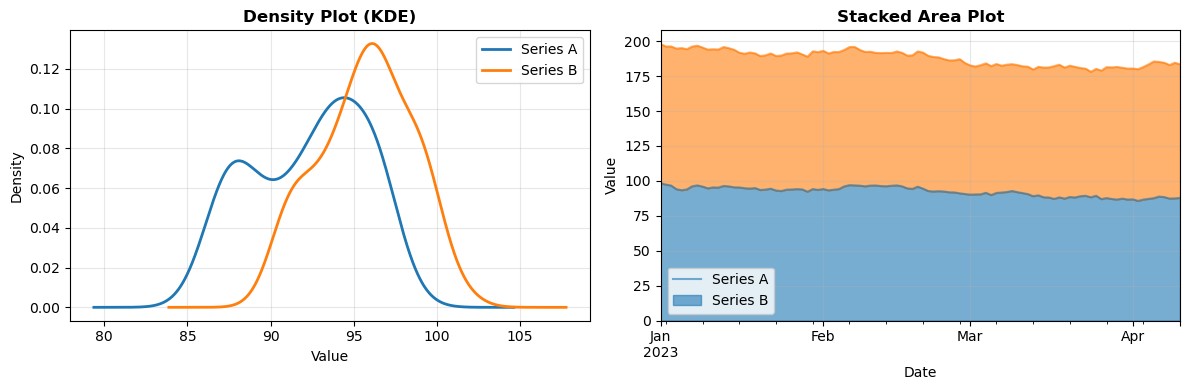

In [42]:
# Exercise 2.1 Solution
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "scipy"])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Density plot
df.plot(kind='density', ax=axes[0], linewidth=2)
axes[0].set_title('Density Plot (KDE)', fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].grid(True, alpha=0.3)
axes[0].legend(['Series A', 'Series B'])

# Right: Stacked area plot
df.plot.area(stacked=True, ax=axes[1], alpha=0.6)
axes[1].set_title('Stacked Area Plot', fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)
axes[1].legend(['Series A', 'Series B'], loc='best')

fig.tight_layout()
# fig

## 2.2 Introduction to Seaborn

`seaborn` builds on matplotlib to provide higher-level statistical graphics that integrate seamlessly with pandas DataFrames.

In [38]:
# Create a sample tips dataset for seaborn examples
tips = pd.DataFrame({
    'total_bill': [18.01, 10.29, 21.01, 23.68, 24.59, 25.29, 8.77, 15.01, 11.02, 14.07,
                   12.5, 16.0, 14.5, 13.2, 15.8, 17.3, 18.5, 19.0, 20.0, 21.5],
    'tip': [1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2, 3.12, 1.96, 3.23,
            2.5, 3.0, 2.8, 2.4, 3.2, 3.5, 3.8, 3.9, 4.2, 4.5],
    'time': ['Dinner', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Lunch', 'Dinner', 'Lunch', 'Lunch',
             'Dinner', 'Lunch', 'Lunch', 'Dinner', 'Dinner', 'Lunch', 'Lunch', 'Dinner', 'Dinner', 'Lunch'],
    'day': ['Thurs', 'Sun', 'Sat', 'Sun', 'Sun', 'Sat', 'Fri', 'Fri', 'Fri', 'Fri',
            'Thurs', 'Sun', 'Sat', 'Sun', 'Sun', 'Sat', 'Fri', 'Fri', 'Fri', 'Fri']
})

# Calculate tip percentage
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

print('Tips dataset (first 5 rows):')
print(tips.head())

Tips dataset (first 5 rows):
   total_bill   tip    time    day   tip_pct
0       18.01  1.01  Dinner  Thurs  0.059412
1       10.29  1.66   Lunch    Sun  0.192352
2       21.01  3.50   Lunch    Sat  0.199886
3       23.68  3.31   Lunch    Sun  0.162494
4       24.59  3.61   Lunch    Sun  0.172069


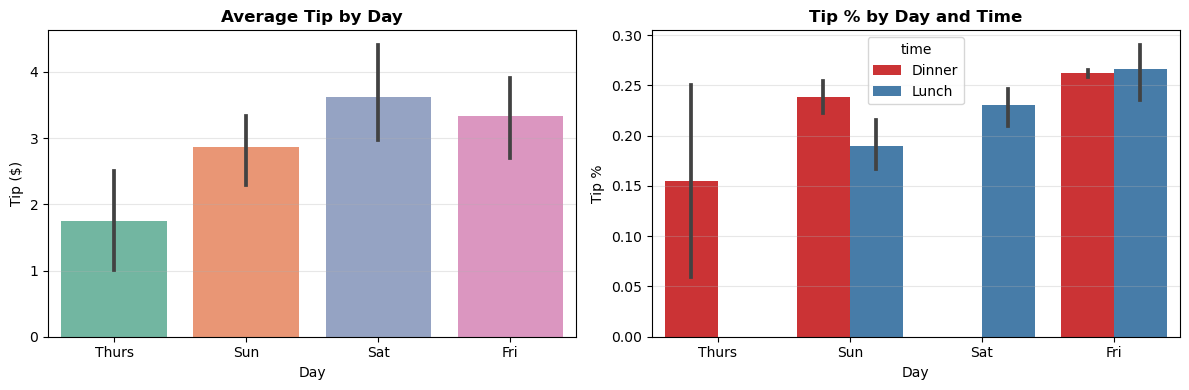

In [39]:
# Seaborn bar plots with automatic statistics
# Code explanation:
# - sns.barplot() automatically calculates mean
# - Shows 95% confidence intervals (black lines)
# - hue parameter adds color grouping by another variable

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Simple bar plot
sns.barplot(x='day', y='tip', data=tips, ax=axes[0], palette='Set2')
axes[0].set_title('Average Tip by Day', fontweight='bold')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Tip ($)')
axes[0].grid(True, alpha=0.3, axis='y')

# Right: Bar plot with hue (color grouping)
sns.barplot(x='day', y='tip_pct', hue='time', data=tips, ax=axes[1], palette='Set1')
axes[1].set_title('Tip % by Day and Time', fontweight='bold')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Tip %')
axes[1].grid(True, alpha=0.3, axis='y')

fig.tight_layout()
# fig

### ✏️ Exercise 2.2: Seaborn Bar Plots

**Task**: Create two seaborn bar plots using the tips dataset:

1. **Top plot**: Average total_bill by day (no grouping)
   - Use different palette (try 'muted', 'pastel', or 'husl')
   - Add title: 'Average Bill by Day'

2. **Bottom plot**: Average total_bill by day, grouped by time (Lunch/Dinner)
   - Use `hue='time'` parameter
   - Use a different palette
   - Add title: 'Average Bill by Day and Time'

Both should have proper labels and grid.

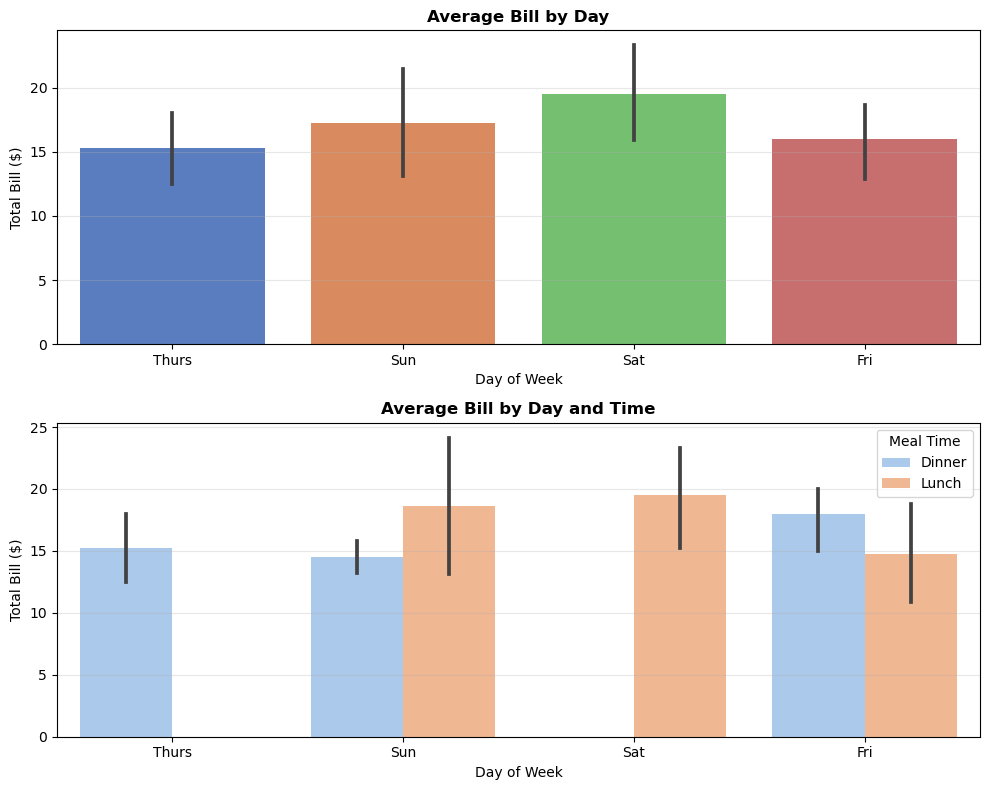

In [43]:
# Exercise 2.2 Solution
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Top plot: Average bill by day
sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0], palette='muted')
axes[0].set_title('Average Bill by Day', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Total Bill ($)')
axes[0].grid(True, alpha=0.3, axis='y')

# Bottom plot: Average bill by day and time
sns.barplot(x='day', y='total_bill', hue='time', data=tips, ax=axes[1], palette='pastel')
axes[1].set_title('Average Bill by Day and Time', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Total Bill ($)')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].legend(title='Meal Time')

fig.tight_layout()
# fig

## 2.3 Distribution Visualization

Histograms and density plots show how data is distributed.

In [ ]:
# Code explanation:
# - sns.histplot(): Combined histogram + KDE
# - bins: Number of histogram bins
# - kde=True: Overlay kernel density estimate
# - stat='density': Normalize to probability density

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Histogram only
sns.histplot(tips['total_bill'], bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Total Bill', fontweight='bold')
axes[0].set_xlabel('Total Bill ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3, axis='y')

# Right: Histogram with KDE overlay
sns.histplot(tips['total_bill'], bins=30, kde=True, ax=axes[1], 
             stat='density', color='lightcoral', edgecolor='black')
axes[1].set_title('Histogram with KDE Overlay', fontweight='bold')
axes[1].set_xlabel('Total Bill ($)')
axes[1].set_ylabel('Density')
axes[1].grid(True, alpha=0.3, axis='y')

fig.tight_layout()
# fig

### ✏️ Exercise 2.3: Distribution Visualization

**Task**: Create a 2×2 subplot grid showing distributions of different variables:

1. **Top-left**: Histogram of total_bill (no KDE)
2. **Top-right**: Histogram of total_bill with KDE
3. **Bottom-left**: Histogram of tip (no KDE), different color
4. **Bottom-right**: Histogram of tip with KDE

All should have:
- Bins: 25
- Grid enabled (y-axis)
- Proper titles and labels

In [ ]:
# Exercise 2.3 Solution
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Top-left: Total bill histogram only
sns.histplot(tips['total_bill'], bins=25, ax=axes[0, 0], color='steelblue', edgecolor='black')
axes[0, 0].set_title('Total Bill (Histogram Only)', fontweight='bold')
axes[0, 0].set_xlabel('Total Bill ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Top-right: Total bill histogram with KDE
sns.histplot(tips['total_bill'], bins=25, kde=True, ax=axes[0, 1], 
             stat='density', color='steelblue', edgecolor='black')
axes[0, 1].set_title('Total Bill (with KDE)', fontweight='bold')
axes[0, 1].set_xlabel('Total Bill ($)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Bottom-left: Tip histogram only
sns.histplot(tips['tip'], bins=25, ax=axes[1, 0], color='coral', edgecolor='black')
axes[1, 0].set_title('Tip (Histogram Only)', fontweight='bold')
axes[1, 0].set_xlabel('Tip ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Bottom-right: Tip histogram with KDE
sns.histplot(tips['tip'], bins=25, kde=True, ax=axes[1, 1], 
             stat='density', color='coral', edgecolor='black')
axes[1, 1].set_title('Tip (with KDE)', fontweight='bold')
axes[1, 1].set_xlabel('Tip ($)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].grid(True, alpha=0.3, axis='y')

fig.tight_layout()
# fig

---

# Section 3: Advanced Visualization Techniques

In this section, you will explore relationships between variables and create multi-dimensional visualizations.

## 3.1 Visualizing Relationships

Scatter plots and regression plots reveal relationships between variables.

In [ ]:
# Code explanation:
# - sns.regplot(): Scatter plot + linear regression line
# - sns.scatterplot(): More customizable scatter plot
# - scatter_kws: Dict of arguments for scatter points
# - line_kws: Dict of arguments for regression line

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Basic regplot
sns.regplot(x='total_bill', y='tip', data=tips, ax=axes[0], 
            scatter_kws={'alpha': 0.6, 's': 100},
            line_kws={'color': 'red', 'linewidth': 2})
axes[0].set_title('Bill vs Tip (with Regression)', fontweight='bold')
axes[0].set_xlabel('Total Bill ($)')
axes[0].set_ylabel('Tip ($)')
axes[0].grid(True, alpha=0.3)

# Right: Colored scatter plot by time
colors = {'Lunch': 'blue', 'Dinner': 'red'}
for time in tips['time'].unique():
    mask = tips['time'] == time
    axes[1].scatter(tips[mask]['total_bill'], tips[mask]['tip'],
                   label=time, alpha=0.6, s=100, color=colors[time])
axes[1].set_title('Bill vs Tip (colored by Time)', fontweight='bold')
axes[1].set_xlabel('Total Bill ($)')
axes[1].set_ylabel('Tip ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

fig.tight_layout()
# fig

### ✏️ Exercise 3.1: Relationship Visualization

**Task**: Create a 1×2 subplot grid showing relationships:

1. **Left plot**: Use `sns.regplot()` to plot total_bill vs tip_pct
   - Customize scatter points (alpha=0.7, s=80)
   - Add title: 'Bill vs Tip Percentage (Linear Regression)'

2. **Right plot**: Use `sns.scatterplot()` with hue
   - Plot total_bill vs tip
   - Use `hue='day'` to color by day of week
   - Add title: 'Bill vs Tip (by Day)'
   - Set palette: 'husl'

**Hint**: `sns.scatterplot(x=, y=, hue=, data=, ax=, palette=)`

In [ ]:
# Exercise 3.1 Solution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Regression plot
sns.regplot(x='total_bill', y='tip_pct', data=tips, ax=axes[0],
            scatter_kws={'alpha': 0.7, 's': 80},
            line_kws={'color': 'green', 'linewidth': 2})
axes[0].set_title('Bill vs Tip % (Linear Regression)', fontweight='bold')
axes[0].set_xlabel('Total Bill ($)')
axes[0].set_ylabel('Tip Percentage')
axes[0].grid(True, alpha=0.3)

# Right: Scatter plot with hue
sns.scatterplot(x='total_bill', y='tip', hue='day', data=tips, ax=axes[1],
               palette='husl', s=100, alpha=0.7)
axes[1].set_title('Bill vs Tip (by Day)', fontweight='bold')
axes[1].set_xlabel('Total Bill ($)')
axes[1].set_ylabel('Tip ($)')
axes[1].grid(True, alpha=0.3)
axes[1].legend(title='Day', loc='best')

fig.tight_layout()
#fig

## 3.2 Categorical and Multi-dimensional Data

Box plots and faceted plots help explore categorical relationships.

In [ ]:
# Code explanation:
# - sns.boxplot(): Box-and-whisker plot
# - Shows: median (line), quartiles (box), outliers (dots)
# - sns.catplot(): Faceted categorical plots
# - col/row parameters create separate plots for each category

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left: Box plot
sns.boxplot(x='day', y='total_bill', data=tips, ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Bill by Day', fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Total Bill ($)')
axes[0].grid(True, alpha=0.3, axis='y')

# Right: Violin plot (like box plot but with density)
sns.violinplot(x='day', y='total_bill', hue='time', data=tips, ax=axes[1], palette='Set1', split=True)
axes[1].set_title('Bill Distribution by Day and Time', fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Total Bill ($)')
axes[1].grid(True, alpha=0.3, axis='y')

fig.tight_layout()
#fig

### ✏️ Exercise 3.2: Box and Categorical Plots

**Task**: Create a 2×2 subplot grid:

1. **Top-left**: Box plot of total_bill by day
   - Palette: 'muted'

2. **Top-right**: Box plot of tip by day and time
   - Use `hue='time'`
   - Palette: 'pastel'

3. **Bottom-left**: Violin plot of total_bill by day
   - Palette: 'husl'

4. **Bottom-right**: Violin plot of tip_pct by day and time
   - Use `hue='time'`, `split=True`
   - Palette: 'Set2'

All should have proper titles, labels, and grid.

In [ ]:
# Exercise 3.2 Solution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Top-left: Box plot of bill by day
sns.boxplot(x='day', y='total_bill', data=tips, ax=axes[0, 0], palette='muted')
axes[0, 0].set_title('Bill by Day (Box Plot)', fontweight='bold')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('Total Bill ($)')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Top-right: Box plot of tip by day and time
sns.boxplot(x='day', y='tip', hue='time', data=tips, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Tip by Day and Time (Box Plot)', fontweight='bold')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Tip ($)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Bottom-left: Violin plot of bill by day
sns.violinplot(x='day', y='total_bill', data=tips, ax=axes[1, 0], palette='husl')
axes[1, 0].set_title('Bill by Day (Violin Plot)', fontweight='bold')
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Total Bill ($)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Bottom-right: Violin plot of tip_pct by day and time
sns.violinplot(x='day', y='tip_pct', hue='time', data=tips, ax=axes[1, 1], 
              palette='Set2', split=True)
axes[1, 1].set_title('Tip % by Day and Time (Violin Plot)', fontweight='bold')
axes[1, 1].set_xlabel('Day')
axes[1, 1].set_ylabel('Tip %')
axes[1, 1].grid(True, alpha=0.3, axis='y')

fig.tight_layout()
# fig

## 3.3 Multi-dimensional Data Exploration

Pair plots and heatmaps help explore relationships among multiple variables at once.

In [ ]:
# Code explanation:
# - sns.pairplot(): Matrix showing all pairwise relationships
# - Diagonal: Distribution of each variable
# - Off-diagonal: Relationships between variables
# - diag_kind='kde': Use density plot on diagonal

# Select numeric columns
numeric_tips = tips[['total_bill', 'tip', 'tip_pct']]

# Create pairplot
g = sns.pairplot(numeric_tips, diag_kind='kde', plot_kws={'alpha': 0.5, 's': 80},
                 diag_kws={'shade': True}, height=2.5)
g.fig.suptitle('Pairwise Relationships Among Variables', fontsize=12, fontweight='bold', y=1.00)
g

In [ ]:
# Correlation heatmap
# Code explanation:
# - sns.heatmap(): Visualize matrix with colors
# - annot=True: Show values in cells
# - cmap='coolwarm': Color scheme
# - center=0: Center colormap at 0

fig, ax = plt.subplots(figsize=(8, 6))

# Calculate correlation matrix
corr_matrix = numeric_tips.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
           square=True, linewidths=1, cbar_kws={'label': 'Correlation'},
           ax=ax)
ax.set_title('Correlation Heatmap of Tip Variables', fontweight='bold', fontsize=12)
fig.tight_layout()
# fig

### ✏️ Exercise 3.3: Multi-dimensional Exploration

**Task**: Create two advanced visualizations:

1. **Pairplot**: Select columns [total_bill, tip, tip_pct]
   - Use `diag_kind='hist'` for histograms on diagonal
   - Set `height=2.5`
   - Use `plot_kws={'alpha': 0.6}`
   - Add appropriate title

2. **Heatmap**: Correlation matrix of the same columns
   - Use `annot=True` to show values
   - Use `fmt='.3f'` to show 3 decimal places
   - Use cmap='RdBu_r' (Red-Blue reversed)
   - Add title: 'Correlation Matrix'

**Note**: Pairplot and heatmap should be created separately (2 figures)

In [ ]:
# Exercise 3.3 Solution - Part 1: Pairplot
numeric_data = tips[['total_bill', 'tip', 'tip_pct']]

g = sns.pairplot(numeric_data, diag_kind='hist', height=2.5,
                 plot_kws={'alpha': 0.6, 's': 80},
                 diag_kws={'bins': 20, 'edgecolor': 'black'})
g.fig.suptitle('Pairplot: Multi-dimensional Relationships', fontsize=13, fontweight='bold', y=1.00)
g

In [ ]:
# Exercise 3.3 Solution - Part 2: Heatmap
fig, ax = plt.subplots(figsize=(8, 6))

corr_matrix = numeric_data.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
           square=True, linewidths=2, cbar_kws={'label': 'Correlation Coefficient'},
           ax=ax, vmin=-1, vmax=1)
ax.set_title('Correlation Matrix Heatmap', fontweight='bold', fontsize=12)
fig.tight_layout()
fig

---

# Optional Content: Advanced Topics

The following sections cover specialized visualization techniques. Explore these topics based on your specific needs and interests.

## Optional 1: Annotations and Highlighting

Add text, arrows, and highlights to emphasize important features.

In [ ]:
# Create a plot with annotations
fig, ax = plt.subplots(figsize=(12, 6))

data = np.random.standard_normal(100).cumsum()
ax.plot(data, linewidth=2, color='blue')

# Code explanation:
# - annotate(): Add text with arrow pointing to data
# - xy: Coordinate of data point
# - xytext: Coordinate of text label
# - arrowprops: Arrow appearance and style

# Annotate peak
peak_idx = data.argmax()
ax.annotate('Peak Value', 
           xy=(peak_idx, data.max()),
           xytext=(peak_idx-15, data.max()+2),
           arrowprops=dict(arrowstyle='->', color='red', lw=2),
           fontsize=11, color='red', fontweight='bold')

# Annotate minimum
min_idx = data.argmin()
ax.annotate('Minimum Value',
           xy=(min_idx, data.min()),
           xytext=(min_idx+15, data.min()-2),
           arrowprops=dict(arrowstyle='->', color='green', lw=2),
           fontsize=11, color='green', fontweight='bold')

# Add horizontal line at mean
ax.axhline(y=data.mean(), color='orange', linestyle='--', linewidth=2, 
          label=f'Mean: {data.mean():.2f}', alpha=0.7)

ax.set_title('Plot with Annotations', fontweight='bold', fontsize=13)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
fig.tight_layout()
# fig

## Optional 2: Seaborn Styles and Color Palettes

Customize the overall appearance of your plots.

In [ ]:
# Available seaborn styles
# Available seaborn styles
print('Available Seaborn Styles:')
print(['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'])
print('\nAvailable Palettes (sample):')
print(['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind'])


In [ ]:
# Compare different styles
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Style 1: darkgrid (default)
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.barplot(x='day', y='total_bill', data=tips, ax=axes[0])
axes[0].set_title('Style: darkgrid + Palette: muted', fontweight='bold')

# Style 2: whitegrid
sns.set_style('whitegrid')
sns.set_palette('husl')
sns.barplot(x='day', y='total_bill', data=tips, ax=axes[1])
axes[1].set_title('Style: whitegrid + Palette: husl', fontweight='bold')

fig.tight_layout()
# fig

## Optional 3: Joint Plots

Visualize bivariate distributions with marginal univariate distributions.

In [ ]:
# Create joint plots
# Code explanation:
# - sns.jointplot(): Central plot + marginal distributions
# - kind='scatter': Scatter plot in center
# - Marginals show distribution of each variable

g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter', height=6)
g.fig.suptitle('Joint Plot: Total Bill vs Tip', fontsize=12, fontweight='bold', y=1.00)
g

In [ ]:
# Joint plot with different kind
# Code explanation:
# - kind='hex': Hexagonal density plot
# - Useful when you have overlapping points

g = sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex', height=6)
g.fig.suptitle('Joint Plot: Hexagonal Density', fontsize=12, fontweight='bold', y=1.00)
g

## Optional 4: Faceted Plots (FacetGrid)

Create multiple plots split by categorical variables for easy comparison.

In [ ]:
# Code explanation:
# - sns.FacetGrid(): Create faceted plot structure
# - col: Split columns by this variable
# - row: Split rows by this variable
# - map(): Apply plot function to each facet

g = sns.FacetGrid(tips, col='time', row='day', height=3.5, aspect=1.2)
g.map(sns.scatterplot, 'total_bill', 'tip', s=100, alpha=0.6)
g.set_titles(col_template="Time: {col_name}", row_template="Day: {row_name}")
g.set_axis_labels('Total Bill ($)', 'Tip ($)')
g.fig.suptitle('Faceted: Bill vs Tip by Time and Day', fontsize=12, fontweight='bold', y=1.00)
g

## Optional 5: Saving Plots

Export plots in various formats for reports, presentations, and publications.

In [ ]:
# Create a plot to save
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='day', y='total_bill', data=tips, ax=ax)
ax.set_title('Average Bill by Day')

# Code explanation:
# - fig.savefig(filename): Save to file
# - dpi: Dots per inch (resolution)
# - bbox_inches='tight': Remove white space
# - facecolor: Background color

# Uncomment to save (adjust path as needed):
# fig.savefig('plot.png', dpi=150, bbox_inches='tight')  # PNG (raster)
# fig.savefig('plot.svg', dpi=150, bbox_inches='tight')  # SVG (vector)
# fig.savefig('plot.pdf', dpi=150, bbox_inches='tight')  # PDF

print('To save plots, uncomment the savefig() lines above')
print('Common DPI values: 72 (screen), 150 (print), 300 (publication)')
# fig

## Optional 6: Global Configuration

Set default parameters for all subsequent plots.

In [ ]:
# Code explanation:
# - plt.rc(): Set global default parameters
# - Changes apply to all subsequent plots

# View current settings
print('Current matplotlib settings:')
print(f'Figure size: {plt.rcParams["figure.figsize"]}')
print(f'Font size: {plt.rcParams["font.size"]}')
print(f'Line width: {plt.rcParams["lines.linewidth"]}')

# Uncomment to modify defaults:
# plt.rc('figure', figsize=(12, 6))  # Change default figure size
# plt.rc('font', size=12)  # Change default font size
# plt.rc('lines', linewidth=2)  # Change default line width
# plt.rc('axes', labelsize=12, titlesize=14)  # Change label sizes

# Reset to defaults:
# plt.rcdefaults()